# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [80]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
pd.set_option('display.max_rows', 1500)

In [81]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
print(hospital_read_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB
None


****
## Preliminary Analysis

In [82]:
# deal with missing and inconvenient portions of data 

clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\user\Anaconda4\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [83]:
#print(hospital_read_df.head())
df = hospital_read_df.copy()
df = df.drop('Footnote', axis = 1)
df = df.dropna(0, how = 'any')
#df = df.infer_objects()
Number_of_discharges = pd.to_numeric(df['Number of Discharges'], downcast = 'integer')
#print(df.head())
#print(df.info())
print(df.columns)
df['Readmission_Rate'] = df['Number of Readmissions']/Number_of_discharges

#print(df.head())
df2 = df.loc[:,['Excess Readmission Ratio','Readmission_Rate', 'Number of Discharges']]
df2 = df2.sort_values(['Readmission_Rate'])
print(df2)

df2['number of discharges'] = Number_of_discharges
print(df2.info())
#df2['cost_per_patient'] = df2['Total Medicare Payment Amount']/df2['Number of Medicare Beneficiaries']

Index(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')
       Excess Readmission Ratio  Readmission_Rate Number of Discharges
13729                    0.5748          0.017794                  843
13718                    0.6600          0.020335                  836
13707                    0.6994          0.020913                  526
13725                    0.6322          0.021127                  852
13688                    0.7213          0.021611                  509
13728                    0.6195          0.021755                 1379
13727                    0.6262          0.022287                 1032
13661                    0.7416          0.022305                  538
13730                    0.5495          0.022566                 2393
13698          

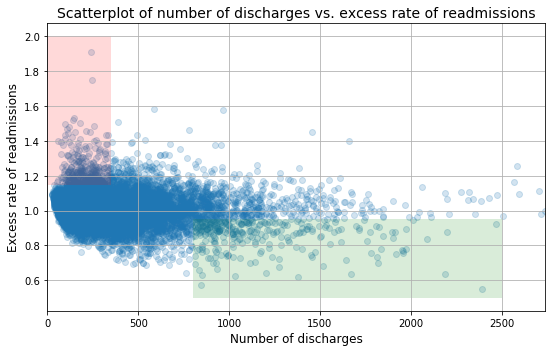

In [75]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

Index(['Excess Readmission Ratio', 'Readmission_Rate', 'Number of Discharges',
       'number of discharges'],
      dtype='object')


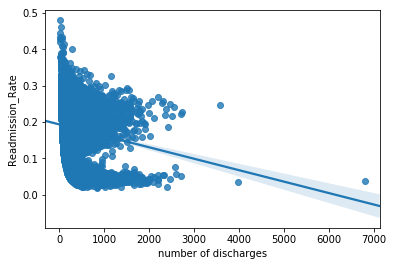

In [79]:
import seaborn as sns
print(df2.columns)
sns.regplot(df2['number of discharges'], df2['Readmission_Rate'])

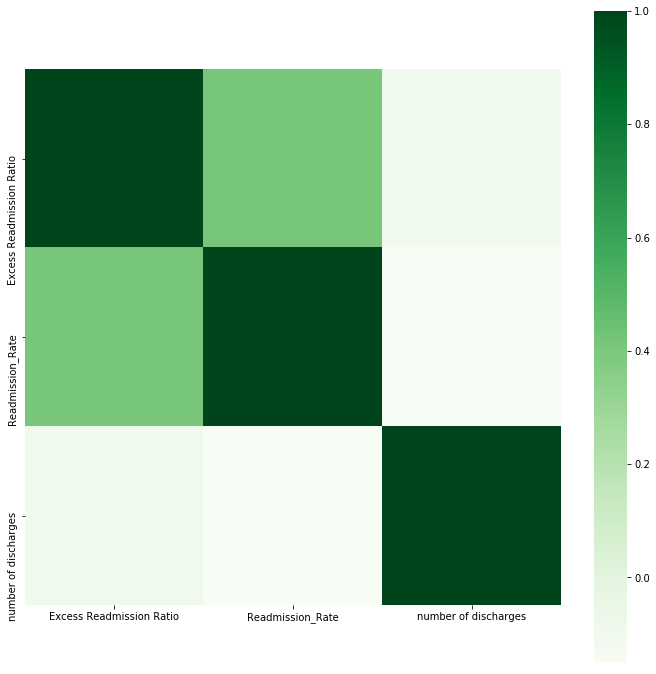

In [77]:
import seaborn as sns
fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
sns.heatmap(df2.corr(), square=True, cmap='Greens')

Q1) Overall, rate of readmissions is trending down with increasing number of discharges?
A1) Yes, rate of readmissions is overall trending down with increasing number of discharges. I found this by creating a new column 'Readmission_Rate'(Readmissions / Total discharges)  . I then did a regression plot and a heatmap comparing total number of discharges and readmission rate. In both instances there are negative coorelations. 

Q2) With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)?
A2) Yes it can be seen that hospitals with lower number of discharges have a greater incidence of excess readmissions. This 
Q3) With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)?
Q3) Yes, overall hospitals with higher number of discharges have lower rates of readmissions. This is particularly clear in the area from 800 to 1500 where although there are not a great concentration of hospitals there are many outliers with particularly low excess rates of readmissions. Of note is that after 1500 discharges, the exess rates of readmissions do begin to slope up again.



****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
Overall I do agree, the statistic 'excess rate of readmission' is not entirely clear to me because it does not perfectly relate to the actual rate of readmission. However in general the rate of readmission does increase with smaller hospitals. Also the fact that 'excess rate of readmission' seems to penalize larger hospitals with high readmissions rates may make the argument even stronger.
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   

In [85]:
from scipy.stats import linregress

linregress(df2['Excess Readmission Ratio'], df2['number of discharges'])

LinregressResult(slope=-326.9972504121876, intercept=694.9171755918267, rvalue=-0.0973979435107936, pvalue=1.222547377673352e-25, stderr=31.1652099010594)

 
   3. Report statistical significance for $\alpha$ = .01. 

Answer:  The reported p-value was found to be: 1.222547377673352e-25. Clearly if you set alpha as .01, there is a relationship of significance.    

   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   statistical significance is the mathematical probablity that there is a coorelating relationship between two variables. Practical significance would be there are practical applications of two variables relationship. The  recommendation of increasing size through consolidation is still a practical recommendation. If the assumption is that it is lack of resources would be there ways that smaller hospitals in proximity could share resources? Additionally from this analysis it is not proven that it is lack of resources that are causing increased rate of readmittance. Another recommendation could be to better understand if there are other variables that are existant in larger hospitals. For instance: Do larger hospitals have access to better computer systems? Do larger hospitals have better patient follow up? Do larger hospitals have better policies as far as discharging patients? Analysis of why some smaller hospitals outperform other small hospitals would also be helpful. 

   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      Some disadvantage of this plot is that there is because there are so many data points it is difficult to see where the density of points is. Additionally, some type of linear regression could be beneficial to help indicate the correlation relationship. Also using statsmodel, we can easily provide some meaningful statistical data.
      - Construct another plot that conveys the same information in a more direct manner.


                               OLS Regression Results                               
Dep. Variable:     Excess Readmission Ratio   R-squared:                       0.009
Model:                                  OLS   Adj. R-squared:                  0.009
Method:                       Least Squares   F-statistic:                     110.1
Date:                      Thu, 13 Jun 2019   Prob (F-statistic):           1.22e-25
Time:                              12:28:27   Log-Likelihood:                 11178.
No. Observations:                     11497   AIC:                        -2.235e+04
Df Residuals:                         11495   BIC:                        -2.234e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

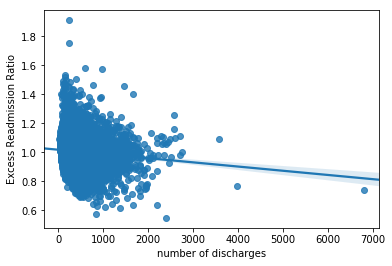

In [93]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

X = df2['number of discharges']
Y = df2['Excess Readmission Ratio']

results = sm.OLS(Y,sm.add_constant(X)).fit()

print (results.summary())

import seaborn as sns
sns.regplot(df2['number of discharges'], df2['Excess Readmission Ratio'])
plt.show()
#X_plot = np.linspace(0,1,100)
#plt.plot(X_plot, X_plot*results.params[0] + results.params[1])

